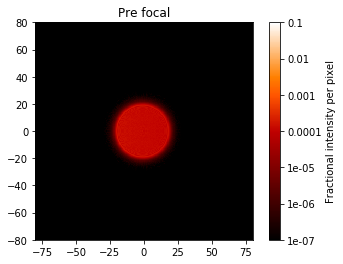

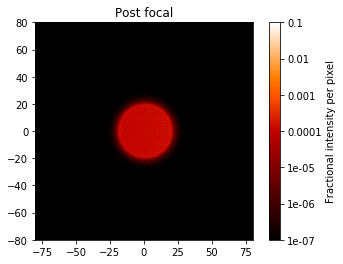

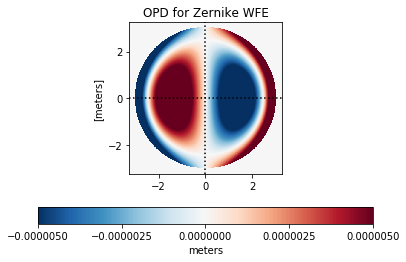

In [ ]:
import poppy
import matplotlib.pyplot as plt
import math

wavelength = 550e-9

Zernikes = [0,0,0,0,0,0,0,50e-6,0]

zern = poppy.ZernikeWFE(coefficients=Zernikes, radius=3)

defocus = 800
pscale = 0.8
fov = 160

"""Run the pre focal image"""
osys = poppy.OpticalSystem(npix = 2048)
osys.add_pupil( poppy.CircularAperture(radius=1))    # pupil radius in meters
osys.add_pupil(zern)
osys.add_pupil( poppy.ThinLens(nwaves = defocus, reference_wavelength = wavelength, radius=3) )
osys.add_detector(pixelscale=pscale, fov_arcsec=fov)  # image plane coordinates in arcseconds
psfpre = osys.calc_psf(wavelength)                            # wavelength in microns


"""Run the post focal image"""
osys = poppy.OpticalSystem(npix = 2048)
osys.add_pupil( poppy.CircularAperture(radius=1))    # pupil radius in meters
osys.add_pupil(zern)
osys.add_pupil( poppy.ThinLens(nwaves = -defocus, reference_wavelength = wavelength, radius=3) )
osys.addRotation(180)
osys.add_detector(pixelscale=pscale, fov_arcsec=fov)  # image plane coordinates in arcseconds
psfpost = osys.calc_psf(wavelength)                            # wavelength in microns

poppy.display_PSF(psfpre, title='Pre focal')
plt.figure()
poppy.display_PSF(psfpost, title='Post focal')
plt.figure()
zern.display(what='opd', opd_vmax = 50e-7)
plt.show()

In [23]:
pim = psfpre[0].header
pim

In [ ]:
ap = 10e-6
A = ap*ap*math.pi
POWER = 16e-6
Intensity = POWER/A
Intensity


SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  400                                                  
NAXIS2  =                  400                                                  
EXTEND  =                    T                                                  
PLANE1  = 'Wavefront Intensity'                                                 
WAVELEN =              5.5E-07 / Weighted mean wavelength in meters             
DIFFLMT =   0.0567228217179515 / Diffraction limit lambda/D in arcsec           
OVERSAMP=                    2 / Oversampling factor for FFTs in computation    
DET_SAMP=                    2 / Oversampling factor for MFT to detector plane  
PIXELSCL=                  0.4 / Scale in arcsec/pix (after oversampling)       
FOV     =                160

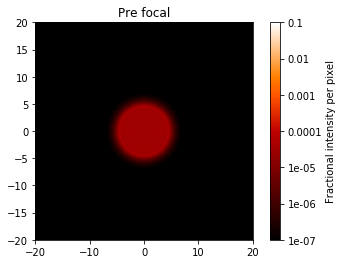

In [9]:
osys = poppy.OpticalSystem()
osys.add_pupil( poppy.CircularAperture(radius=1))    # pupil radius in meters
osys.add_pupil(zern)
osys.add_pupil( poppy.ThinLens(nwaves = defocus, reference_wavelength = wavelength, radius=3) )
osys.add_detector(pixelscale=pscale, fov_arcsec=fov)  # image plane coordinates in arcseconds
psf = osys.calc_psf(wavelength) 
poppy.display_PSF(psf, title='Pre focal')
plt.show()